# <center><font color='MediumSeaGreen'> _Módulo Machine Learning G45_</font>
# <center><font color='MediumSeaGreen'> Desafío evaluado - Expansiones basales </font>
## <center> _Método de regularización lineal y expansiones basales_ 
    
### <center><b> Bárbara Pérez </b><center>
    

___

## <font color='MediumSeaGreen'>Descripción</font>

- Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos.

- Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.

- Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

_______

## <font color='MediumSeaGreen'>Ejercicio 1: Preparación del Ambiente de Trabajo</font>

- Importe los módulos clásicos del trabajo en ciencia de datos.

- El archivo tiene el nombre <span style='background:gainsboro'><font color='dimgray'>compresive_strength_concrete.csv.</font></span> Importe y genere estadísticas descriptivas.

- En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería <span style='background:gainsboro'><font color='dimgray'>pyGAM</font></span>.


In [1]:
#Importar librerias basicas
import matplotlib.pyplot as plt #version 3.5.2
import pandas as pd  #version 1.4.3
import seaborn as sns  #version 0.11.2
import numpy as np  #version 1.23.0


import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importar librerias asociadas a regularización

#librería para análisis exploratorio
import pandas_profiling

#librería para pre procesamiento
from sklearn.preprocessing import StandardScaler

#librerias para modelamiento

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split

#librerías para las métricas
from sklearn.metrics import mean_squared_error, median_absolute_error

#Libreria pyGam
import pygam

In [3]:
#seteamos elementos cosméticos para los gráficos
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
#Importar base de datos
df = pd.read_csv('compresive_strength_concrete.csv')
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                             79.99  
1                                             61.89  
2                                             40.27  
3                                             41.05  
4                                             44.30

In [5]:
#Inspeccionar los tipos de variables de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
#Descripción de variables
df.describe()

Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.167864   
std                                   104.506364   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895825       
std                                            86.279342       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.188350   
std                                     63.997004   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.300000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.567282   
std                                    21.354219   
min                                   121.800000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.204660     
std                                             5.973841     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.400000     
75%                                            10.200000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918932      
std                                            77.753954      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.580485    45.662136   
std                                            80.175980    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.500000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1030.000000  
mean                                          35.817961  
std                                           16.705742

_____

## <font color='MediumSeaGreen'>Ejercicio 2: Descripción</font>

- El vector objetivo tiene el nombre de Concrete <span style='background:gainsboro'><font color='dimgray'>compressive strength(MPa, megapascals)</font></span>.

- Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice <span style='background:gainsboro'><font color='dimgray'>iloc</font></span>.

- Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decide si es necesario normalizarlos/escalarlos.


In [7]:
#Renombrar las variables
df.columns=['cement','blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age_day', 'concrete_compressive_strength']

In [8]:
#Revisamos los cambios realizados
df.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate  age_day  concrete_compressive_strength  
0            1040.0           676.0       28                          79.99  
1            1055.0           676.0       28                          61.89  
2             932.0           594.0      270                          40.27  
3             932.0           594.0      365                          41.05  
4             978.4           825.5      360                          44.30

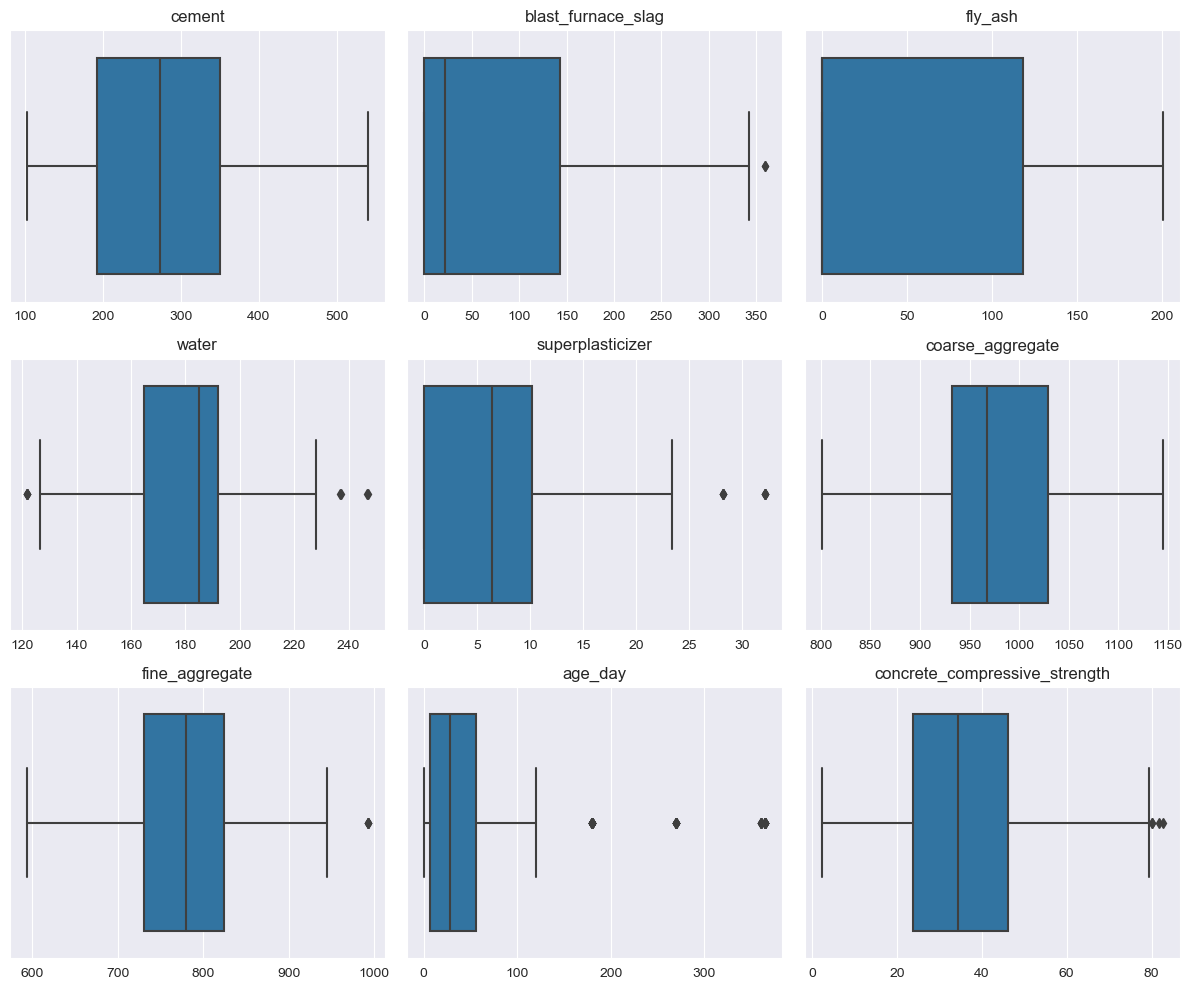

In [9]:
cols = 3
rows = int(df.shape[1] / cols)

plt.figure(figsize=(12,10))
for i, col in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(df[col])
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

Se observan varios datos outliers en los graficos, por lo que aplicaremos StandarScaler

In [10]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

________

## <font color='MediumSeaGreen'>Ejercicio 3: Modelo</font>

- En base al vector objetivo, decida el mejor modelo e importe con <span style='background:gainsboro'><font color='dimgray'>pygam</font></span>. Condicional a esto, importe las métricas de desempeño asociadas.
- Genere conjuntos de entrenamiento y validación.
- Genere un primer modelo sin implementar la función <span style='background:gainsboro'><font color='dimgray'>gridsearch</font></span>. Reporte el hiper parámetro <span style='background:gainsboro'><font color='dimgray'>lam</font></span> así como las métricas de desempeño asociadas.
- Genere un segundo modelo implementando <span style='background:gainsboro'><font color='dimgray'>gridsearch</font></span> en lambda con un <span style='background:gainsboro'><font color='dimgray'>logspace</font></span> entre -3 y 3. Comente sobre el mejor hiper parámetro y sus métricas de desempeño.

In [11]:
#Inspeccionamos el valor objetivo
df['concrete_compressive_strength'].value_counts()

33.40    6
77.30    4
79.30    4
31.35    4
71.30    4
        ..
47.40    1
51.96    1
56.74    1
17.57    1
32.77    1
Name: concrete_compressive_strength, Length: 845, dtype: int64

Observamos que el valor objetivo posee 845 elementos, se deduce que es una variable continua. Por lo anterior se decide aplicar el modelo de regresion lineal pyGAM

In [12]:
#dividimos la data
X = df.drop(columns='concrete_compressive_strength', axis=1) #se toman todas las variables menos la objetivo

y = df['concrete_compressive_strength'] #se asigna la variable objetivo

#Separación de subsets de test y train
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2401)

In [13]:
#Estandarizamos la data
scaler = StandardScaler()
scaler.fit(X_train_pre)
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns=X_train_pre.columns)
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns=X_test_pre.columns)

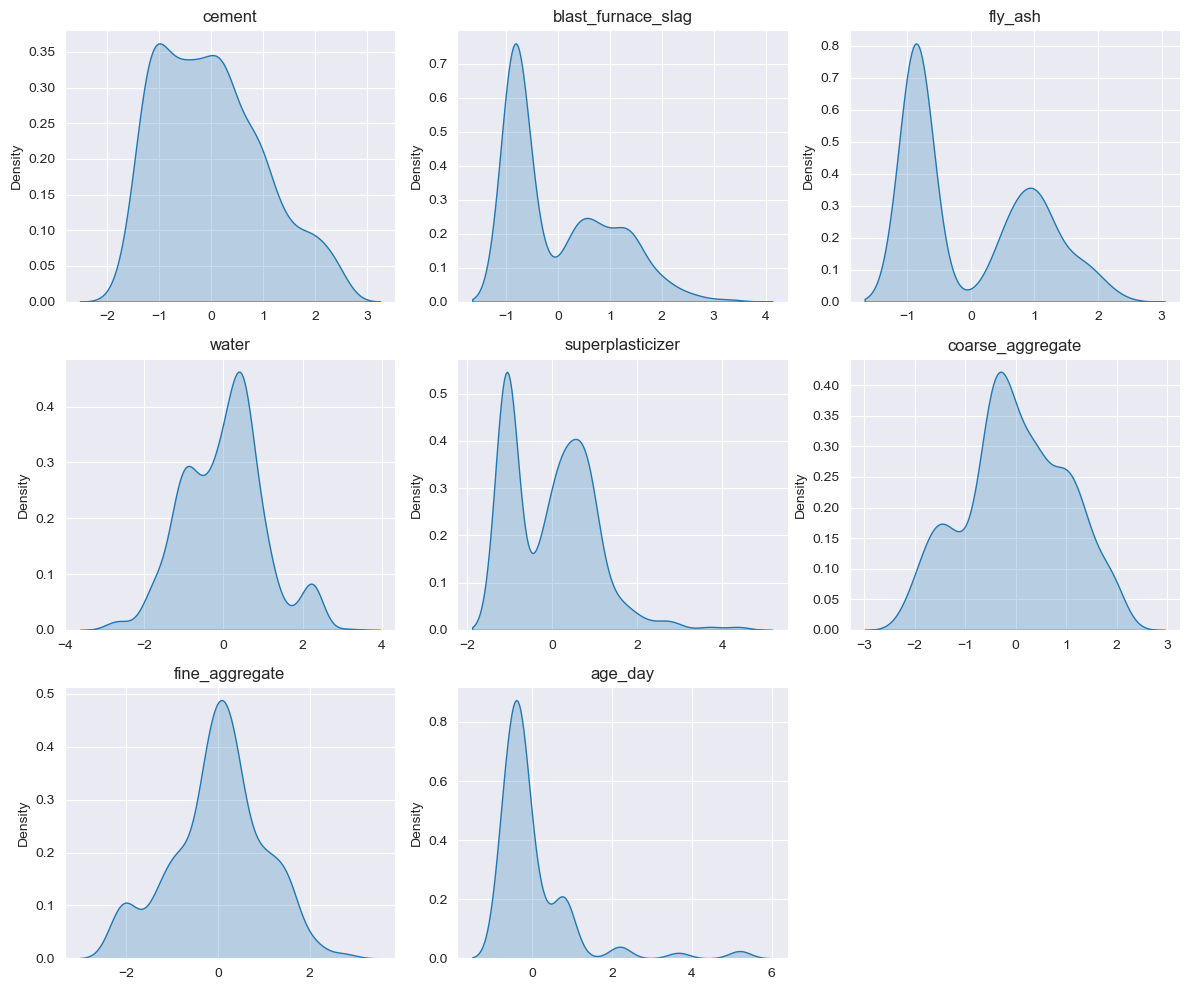

In [14]:
#graficamos las variables estandarizadas
cols = 3
rows = int(X_train.shape[1] / cols)+1
plt.figure(figsize=(12,10))

for i, col in enumerate(X_train.columns):
    plt.subplot(rows, cols, i + 1)
    sns.kdeplot(X_train[col], shade=True)
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [17]:
# Revisión de los conjuntos
print('Conjunto de entrenamiento:')
print(X_train.shape)
print('Vector objetivo de entrenamiento:')
print(y_train.shape)
print('Conjunto de prueba:')
print(X_test.shape)
print('Vector objetivo de prueba:')
print(y_test.shape)



Conjunto de entrenamiento:
(721, 8)
Vector objetivo de entrenamiento:
(721,)
Conjunto de prueba:
(309, 8)
Vector objetivo de prueba:
(309,)


### Creamos un modelo con linearGAM sin gridsearch

In [18]:
from pygam import LinearGAM

#Creamos el modelo y lo entrenamos en la misma linea de codigo
lineargam_sin_gs = LinearGAM().fit(X_train, y_train)

In [19]:
### Reportamos las metricas del modelo
lineargam_sin_gs.summary() 

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     80.1997
Link Function:                     IdentityLink Log Likelihood:                                 -3015.3355
Number of Samples:                          721 AIC:                                             6193.0703
                                                AICc:                                            6213.9676
                                                GCV:                                               32.0263
                                                Scale:                                             25.6853
                                                Pseudo R-Squared:                                   0.9173
Feature Function                  Lam

Se observa un Rcuadrado muy alto, de  0.9173

In [20]:
#Reportamos los hiperparametros de Lamda
lineargam_sin_gs.lam

[[0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6]]

## Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3.

In [24]:
#Definimos el rango de hiperparametro a evaluar 
parametros = {'lam': [np.logspace(-3, 3 ,3)]*8}

In [25]:
#from sklearn.model_selection import GridSearchCV

#Creamos el segundo modelo y lo entrenamos

lineargam_con_gs = LinearGAM().gridsearch(X = X_train.values, y = y_train.values, **parametros)

100% (6561 of 6561) |####################| Elapsed Time: 0:08:51 Time:  0:08:51


In [26]:
#métricas del modelo
lineargam_con_gs.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     98.3526
Link Function:                     IdentityLink Log Likelihood:                                 -2937.3401
Number of Samples:                          721 AIC:                                             6073.3855
                                                AICc:                                            6105.5142
                                                GCV:                                               30.3707
                                                Scale:                                             23.0182
                                                Pseudo R-Squared:                                    0.928
Feature Function                  Lam

Se observa que el modelo contruido con gridsearch tiene un mejor pseudo R2 que el modelo anterior; en este modelo tiene un pseudo R2 de 0.928

In [27]:
#Reportamos el hiperparametro
lineargam_con_gs.lam

[[1.0], [0.001], [1.0], [0.001], [0.001], [1.0], [1.0], [0.001]]

__________

## <font color='MediumSeaGreen'>Ejercicio 4: Dependencia Parcial</font>

- En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.

- Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.

- Reporte brevemente sobre qué atributos están asociados a mayores y menores niveles de resistencia.

________

In [28]:
#función solicitada
def grilla_gam(modelo):
    plt.rcParams['figure.figsize'] = (16,14)
    attribute = X_train.columns
    teminos = list(zip(attribute, modelo.terms[0:len(modelo.terms)-1]))
    cols = 2; rows = int(len(attribute) / cols)
    for i, term in enumerate(teminos):
        plt.subplot(rows, cols, i+1)
        x_grid = modelo.generate_X_grid(term = i)
        partial_dep, confidence_intervals = modelo.partial_dependence(
                                            term = i,
                                            X = x_grid,
                                            width = 0.95)
        plt.plot(x_grid[:, term[1].feature], partial_dep)
        plt.plot(x_grid[:, term[1].feature], confidence_intervals, c='r', ls='--')
        plt.title(repr(term[0]))
    plt.tight_layout()
    plt.show()

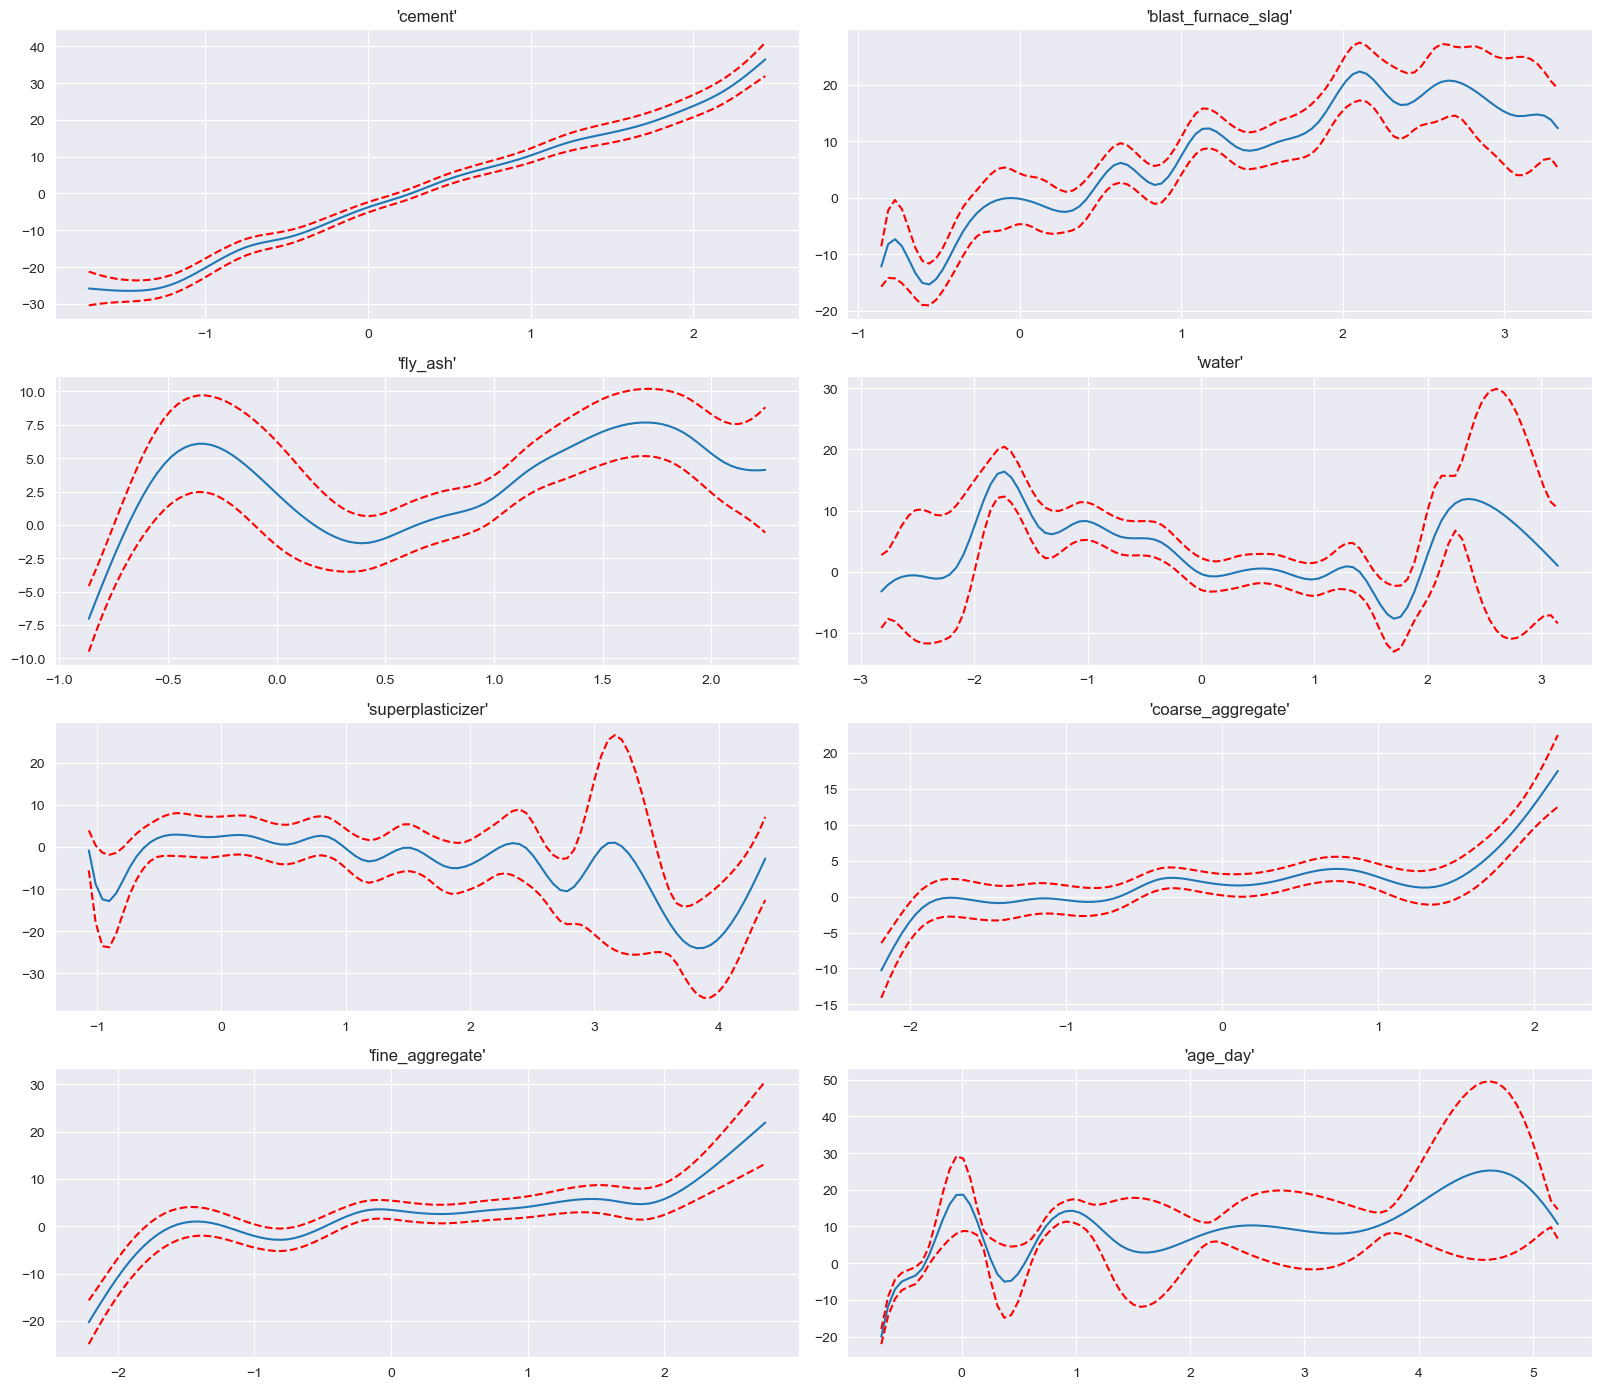

In [29]:
grilla_gam(lineargam_con_gs)

En los graficos podemos observar los atrivutos asociados a nuestro valor objetivo ('concrete_compressive_strength'):

- 'cement', a mayor valor muestra aumento en la resistencia, con una baja tasa de error

- 'blast_furnace_slag', a mayor valor muestra aumento en la resistencia, pero con una tasa alta de error    
- 'coarse_aggregate', a mayor valor muestra aumento en la resistencia, pero con una tasa alta de error    
- 'fine_aggregate', a mayor valor muestra aumento en la resistencia, pero con una tasa alta de error    

Los otros atributos no nombrados presentan una alta taza de error 